# Paresh Meher

# GRIP - The Spark Foundation- Data Science & Business Analytics Internship

 # Task 1

# To predict the score of a student who studies for 9.25 hrs/ day

Importing all the required libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(data)

print('Data is imported successfully in the notebook')
df

Data is imported successfully in the notebook


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot data points on 2D graph to see our dataset and if we can manually find any relationship between the data.

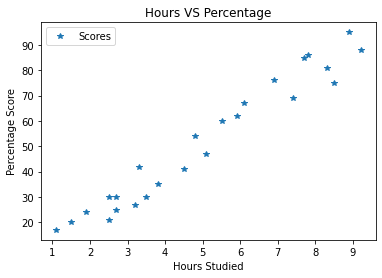

In [21]:
#plotting the distribution score

df.plot(x = 'Hours', y= 'Scores', style = '*')
plt.title('Hours VS Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph we can see that there is a positive linear relation between the hours studied and score.

# Preparing Data

In [27]:
#dividing data into two variables
#iloc[:, start_col:end_col]

X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 


In [28]:
# Now that we have divided our data, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn

from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm

In [29]:
#we will train our algorithm

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


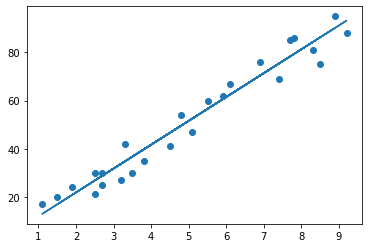

In [31]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making Predictions

In [32]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [33]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [46]:
# You can also test with your own data

study_hours = 9.25
score_pred = regressor.predict([[study_hours]])
print("Number of hours = {}".format(study_hours))
print("Predicted scores = {}".format(score_pred[0]))

Number of hours = 9.25
Predicted scores = 93.69173248737538


# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. We have chosen the mean square error. 

In [38]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.18385989900298
